In [3]:
!pip install webdriver-manager

In [4]:
from webdriver_manager.chrome import ChromeDriverManager 

Tickers (separated by ",": TSLA, AAPL
TSLA


/var/folders/qg/y1d1577d6_zdj2rfwsn6lwsh0000gn/T/ipykernel_3403/910531993.py:31: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())
/var/folders/qg/y1d1577d6_zdj2rfwsn6lwsh0000gn/T/ipykernel_3403/910531993.py:46: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


SUCCESS
 AAPL
SUCCESS
FINISHED


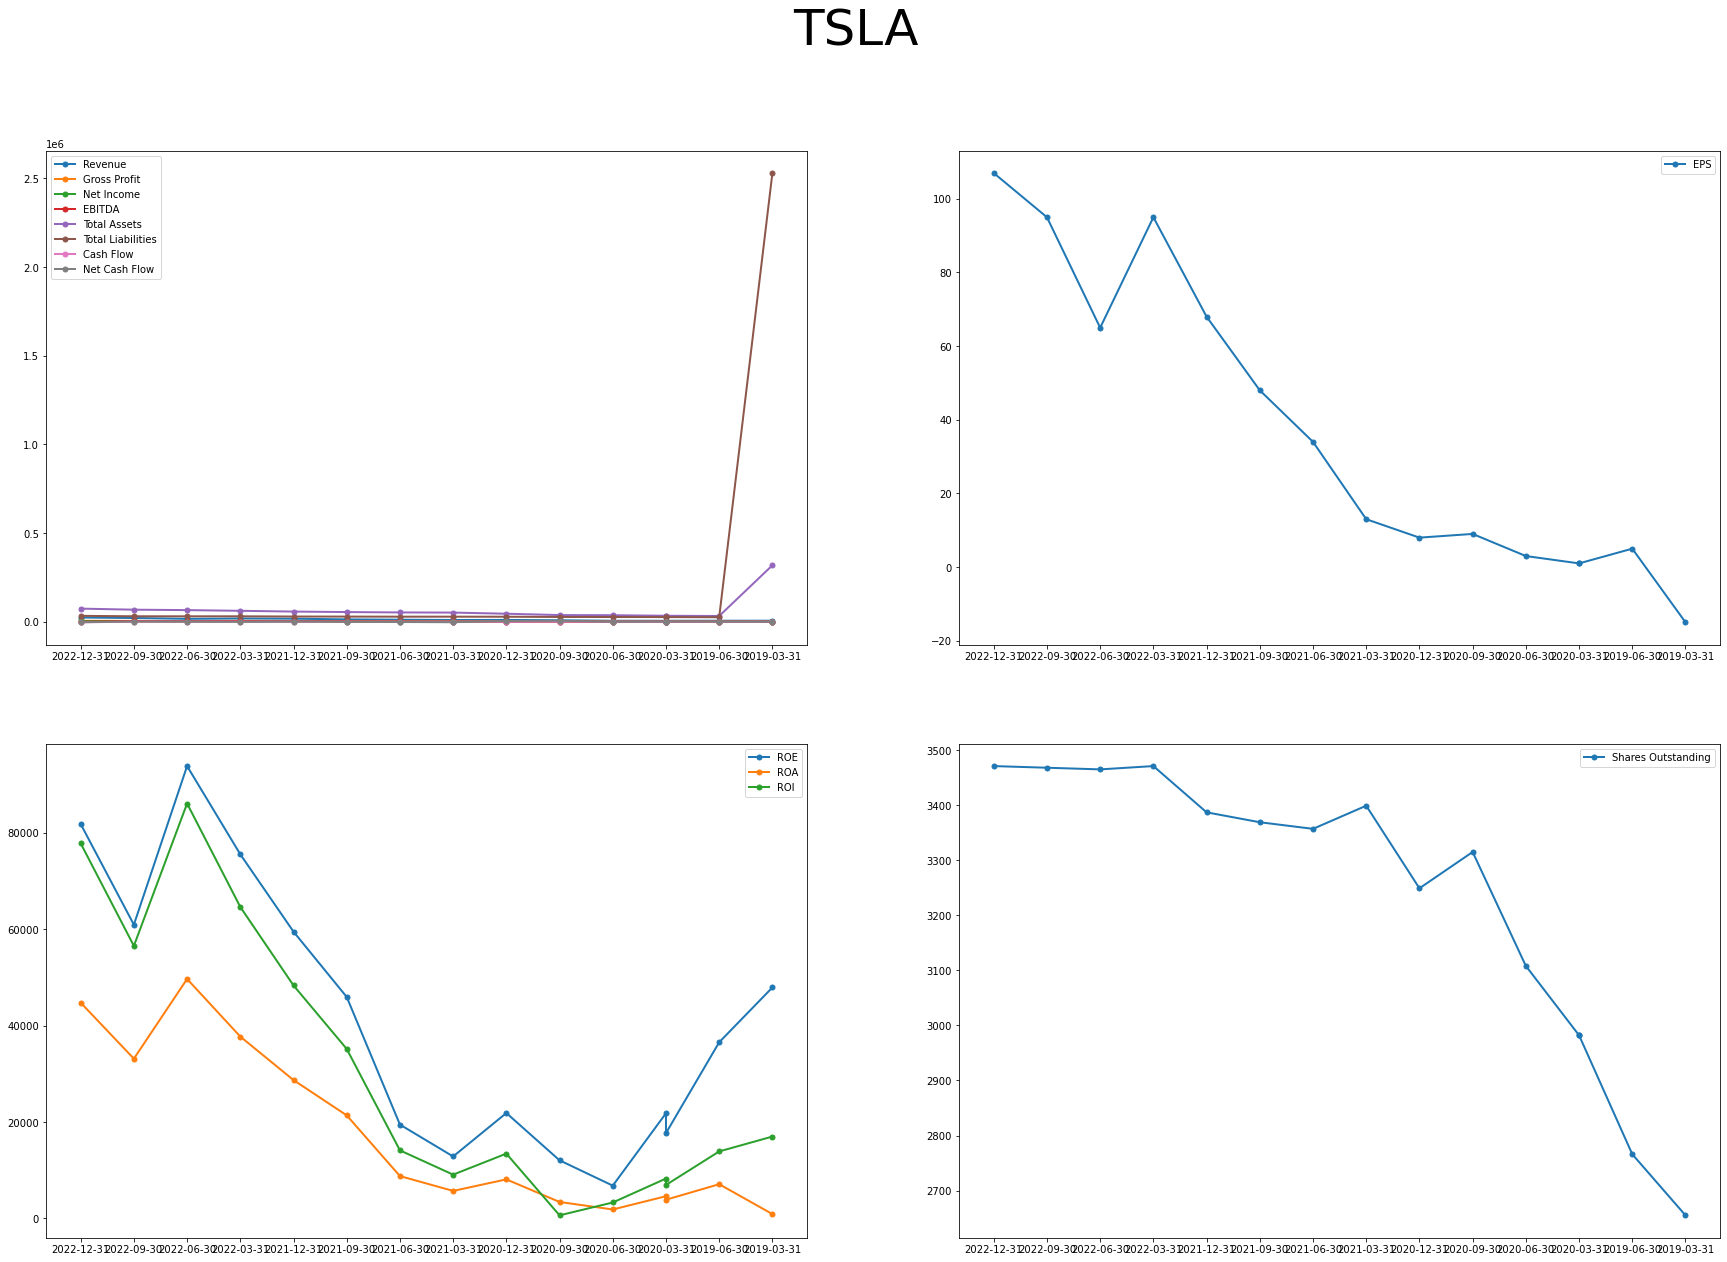

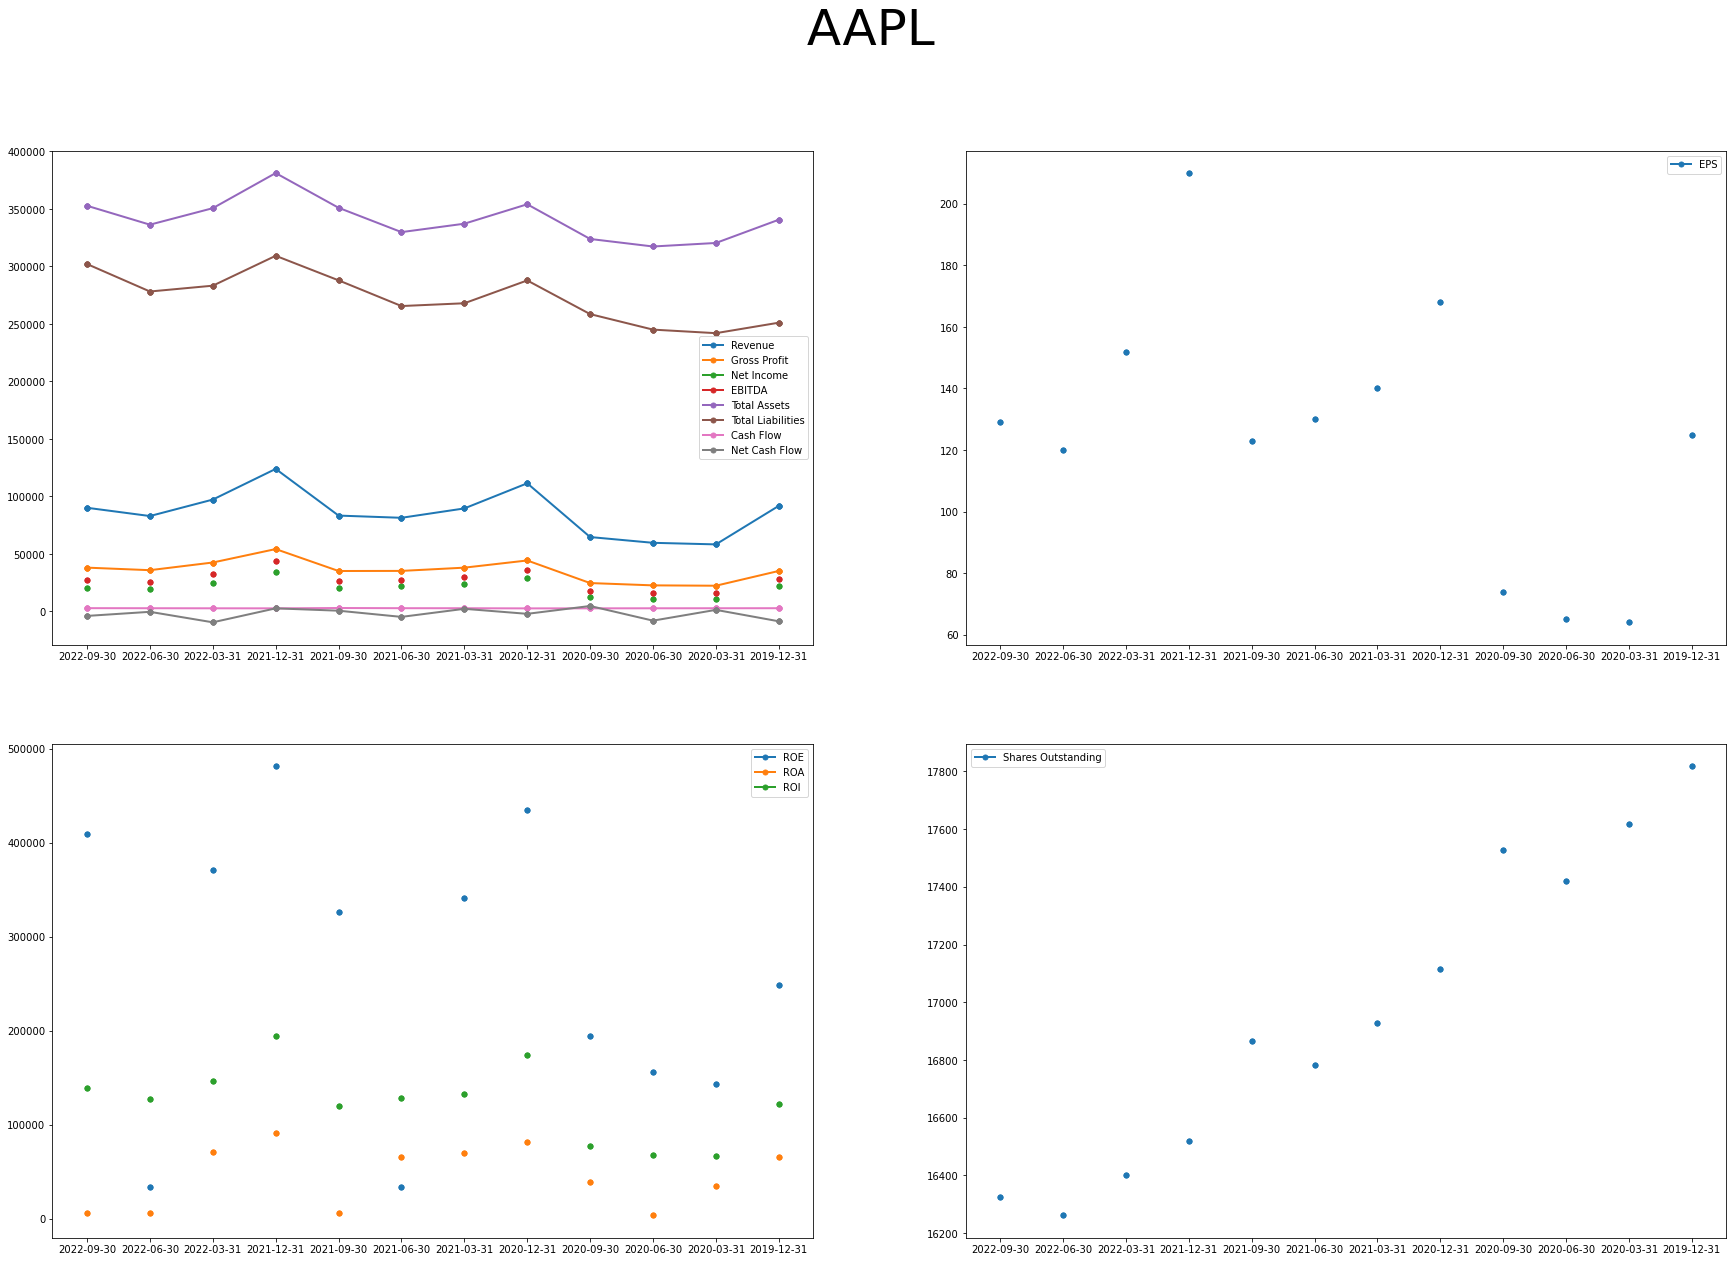

In [21]:

#Scraping all financial data available from MacroTrends website creating dataframes with 'pandas' and ploting data with 'matplotlib', written by Capuccino.
#packages
!pip install openpyxl
!pip install selenium
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
import time
import re
!pip install numpy
import numpy as np
!pip install pandas
import pandas as pd
!pip install matplotlib
import matplotlib.pyplot as plt
import requests
!pip install pandas_datareader
import pandas_datareader.data as web
from pandas.api.types import CategoricalDtype
import os
#input tickers creating a list with all input data
tickers = input('Tickers (separated by ",": ')
z = list(map(str,tickers.split(',')))
#getting correct urls for each ticker
for i in z:
    a=i
    print(a)
    driver = webdriver.Chrome(ChromeDriverManager().install())
    url = 'https://www.macrotrends.net/'
    driver.get(url)
    box = driver.find_element(By.CSS_SELECTOR, ".js-typeahead")
    box.send_keys(a)
    time.sleep(1)
    box.send_keys(Keys.DOWN, Keys.RETURN)
    time.sleep(1)
    geturl = driver.current_url
    time.sleep(4)
    driver.quit()
    #check if the ticker is available in MacroTrends
    if "stocks" in geturl:
        geturlsp = geturl.split("/", 20)
        geturlf = url+"stocks/charts/"+geturlsp[5]+"/"+geturlsp[6]+"/"
        driver = webdriver.Chrome(ChromeDriverManager().install())
        #describe quarterly statements using ?freq=Q
        fsurl = geturlf+"financial-statements?freq=Q"
        driver.get(fsurl)
        #check if the data in the ticker is available
        if driver.find_elements(By.CSS_SELECTOR, "div.jqx-grid-column-header:nth-child(1) > div:nth-child(1) > div:nth-child(1) > span:nth-child(1)"):
            #financial-statements
            driver.set_window_size(2000, 2000)
            time.sleep(10)
            fsa = driver.find_element(By.CSS_SELECTOR, "#contenttablejqxgrid").text
            da = driver.find_element(By.CSS_SELECTOR, "#columntablejqxgrid").text
            arrow = driver.find_element(By.CSS_SELECTOR, ".jqx-icon-arrow-right")
            webdriver.ActionChains(driver).click_and_hold(arrow).perform()
            time.sleep(4)
            fsb = driver.find_element(By.CSS_SELECTOR, "#contenttablejqxgrid").text
            db = driver.find_element(By.CSS_SELECTOR, "#columntablejqxgrid").text
            #balance-sheet
            bsurl = geturlf+"balance-sheet?freq=Q"
            driver.get(bsurl)
            driver.set_window_size(2000, 2000)
            bsa = driver.find_element(By.CSS_SELECTOR, "#contenttablejqxgrid").text
            arrow = driver.find_element(By.CSS_SELECTOR, ".jqx-icon-arrow-right")
            webdriver.ActionChains(driver).click_and_hold(arrow).perform()
            time.sleep(4)
            bsb = driver.find_element(By.CSS_SELECTOR, "#contenttablejqxgrid").text
            #cash-flow
            bsurl = geturlf+"cash-flow-statement?freq=Q"
            driver.get(bsurl)
            driver.set_window_size(2000, 2000)
            cfa = driver.find_element(By.CSS_SELECTOR, "#contenttablejqxgrid").text
            arrow = driver.find_element(By.CSS_SELECTOR, ".jqx-icon-arrow-right")
            webdriver.ActionChains(driver).click_and_hold(arrow).perform()
            time.sleep(4)
            cfb = driver.find_element(By.CSS_SELECTOR, "#contenttablejqxgrid").text
            #financial-ratio
            bsurl = geturlf+"financial-ratios?freq=Q"
            driver.get(bsurl)
            driver.set_window_size(2000, 2000)
            fra = driver.find_element(By.CSS_SELECTOR, "#contenttablejqxgrid").text
            arrow = driver.find_element(By.CSS_SELECTOR, ".jqx-icon-arrow-right")
            webdriver.ActionChains(driver).click_and_hold(arrow).perform()
            time.sleep(4)
            frb = driver.find_element(By.CSS_SELECTOR, "#contenttablejqxgrid").text
            driver.quit()
            #remove symbols from variables
            fsz = fsa.replace(".","").replace("$","").replace(",","")
            fsx = fsb.replace(".","").replace("$","").replace(",","")
            bsz = bsa.replace(".","").replace("$","").replace(",","")
            bsx = bsb.replace(".","").replace("$","").replace(",","")
            cfz = cfa.replace(".","").replace("$","").replace(",","")
            cfx = cfb.replace(".","").replace("$","").replace(",","")
            frz = fra.replace(".","").replace("$","").replace(",","")
            frx = frb.replace(".","").replace("$","").replace(",","")
            dz = da.replace("$","").replace(".","")
            dx = db.replace("$","").replace(".","")
            #split variables into lists
            fszs = fsz.splitlines()
            fsxs = fsx.splitlines()
            bszs = bsz.splitlines()
            bsxs = bsx.splitlines()
            cfzs = cfz.splitlines()
            cfxs = cfx.splitlines()
            frzs = frz.splitlines()
            frxs = frx.splitlines()
            dzs = dz.splitlines()
            dxs = dx.splitlines()
            #removing title from dates dataframe
            dzsr = np.delete(dzs, (0), axis=0)
            dxsr = np.delete(dxs, (0), axis=0)
            #define headers for data
            last_key = None
            fszsr = {}
            for i in fszs:
                if not (i.isnumeric() or i == '-' or i.startswith('-')):
                    last_key = i
                elif last_key in fszsr:
                    fszsr[last_key].append(i)
                else:
                    fszsr[last_key] = [i] 
            last_key = None
            fsxsr = {}
            for i in fsxs:
                if not (i.isnumeric() or i == '-' or i.startswith('-')):
                    last_key = i
                elif last_key in fsxsr:
                    fsxsr[last_key].append(i)
                else:
                    fsxsr[last_key] = [i]
            last_key = None
            bszsr = {}
            for i in bszs:
                if not (i.isnumeric() or i == '-' or i.startswith('-')):
                    last_key = i
                elif last_key in bszsr:
                    bszsr[last_key].append(i)
                else:
                    bszsr[last_key] = [i]  
            last_key = None
            bsxsr = {}
            for i in bsxs:
                if not (i.isnumeric() or i == '-' or i.startswith('-')):
                    last_key = i
                elif last_key in bsxsr:
                    bsxsr[last_key].append(i)
                else:
                    bsxsr[last_key] = [i]
            last_key = None
            cfzsr = {}
            for i in cfzs:
                if not (i.isnumeric() or i == '-' or i.startswith('-')):
                    last_key = i
                elif last_key in cfzsr:
                    cfzsr[last_key].append(i)
                else:
                    cfzsr[last_key] = [i]   
            last_key = None
            cfxsr = {}
            for i in cfxs:
                if not (i.isnumeric() or i == '-' or i.startswith('-')):
                    last_key = i
                elif last_key in cfxsr:
                    cfxsr[last_key].append(i)
                else:
                    cfxsr[last_key] = [i]
            last_key = None
            frzsr = {}
            for i in frzs:
                if not (i.isnumeric() or i == '-' or i.startswith('-')):
                    last_key = i
                elif last_key in frzsr:
                    frzsr[last_key].append(i)
                else:
                    frzsr[last_key] = [i]  
            last_key = None
            frxsr = {}
            for i in frxs:
                if not (i.isnumeric() or i == '-' or i.startswith('-')):
                    last_key = i
                elif last_key in frxsr:
                    frxsr[last_key].append(i)
                else:
                    frxsr[last_key] = [i]
            #creating dataframes
            fszdf = pd.DataFrame(fszsr)
            fsxdf = pd.DataFrame(fsxsr)
            bszdf = pd.DataFrame(bszsr)
            bsxdf = pd.DataFrame(bsxsr)
            cfzdf = pd.DataFrame(cfzsr)
            cfxdf = pd.DataFrame(cfxsr)
            frzdf = pd.DataFrame(frzsr)
            frxdf = pd.DataFrame(frxsr)
            dzsrf = pd.DataFrame(dzsr)
            dxsrf = pd.DataFrame(dxsr)
            #treating dataframes
            fszdff = fszdf.replace("-","0")
            fszdff = fszdff.astype(float)
            fsxdff = fsxdf.replace("-","0")
            fsxdff = fsxdff.astype(float)
            bszdff = bszdf.replace("-","0")
            bszdff = bszdff.astype(float)
            bsxdff = bsxdf.replace("-","0")
            bsxdff = bsxdff.astype(float)
            cfzdff = cfzdf.replace("-","0")
            cfzdff = cfzdff.astype(float)
            cfxdff = cfxdf.replace("-","0")
            cfxdff = cfxdff.astype(float)
            frzdff = frzdf.replace("-","0")
            frzdff = frzdff.astype(float)
            frxdff = frxdf.replace("-","0")
            frxdff = frxdff.astype(float)
            #naming dates dataframe
            ddzsrf = dzsrf.set_axis(["Dates"], axis=1)
            ddxsrf = dxsrf.set_axis(["Dates"], axis=1)
            #merging dataframes
            fszdffd = ddzsrf.merge(fszdff, left_index=True, right_index=True)
            fsxdffd = ddxsrf.merge(fsxdff, left_index=True, right_index=True)
            bszdffd = ddzsrf.merge(bszdff, left_index=True, right_index=True)
            bsxdffd = ddxsrf.merge(bsxdff, left_index=True, right_index=True)
            cfzdffd = ddzsrf.merge(cfzdff, left_index=True, right_index=True)
            cfxdffd = ddxsrf.merge(cfxdff, left_index=True, right_index=True)
            frzdffd = ddzsrf.merge(frzdff, left_index=True, right_index=True)
            frxdffd = ddxsrf.merge(frxdff, left_index=True, right_index=True)
            #defining dates as rows headers
            fszn = fszdffd.set_index("Dates")
            fsxn = fsxdffd.set_index("Dates")
            bszn = bszdffd.set_index("Dates")
            bsxn = bsxdffd.set_index("Dates")
            cfzn = cfzdffd.set_index("Dates")
            cfxn = cfxdffd.set_index("Dates")
            frzn = frzdffd.set_index("Dates")
            frxn = frxdffd.set_index("Dates")
            #concatenate whole data
            fsconcatdd = pd.concat([fszn,fsxn])
            fsdados = fsconcatdd.drop_duplicates()
            bsconcatdd = pd.concat([bszn,bsxn])
            bsdados = bsconcatdd.drop_duplicates()
            cfconcatdd = pd.concat([cfzn,cfxn])
            cfdados = cfconcatdd.drop_duplicates()
            frconcatdd = pd.concat([frzn,frxn])
            frdados = frconcatdd.drop_duplicates()
            #creating final dataframe
            ca = fsdados.merge(bsdados, left_index=True, right_index=True)
            cb = ca.merge(cfdados, left_index=True, right_index=True)
            complete = cb.merge(frdados, left_index=True, right_index=True)
            #managing plots
            fig1, f1_axes = plt.subplots(ncols=2, nrows=2, figsize=(30,20))
            fig1.suptitle (a, size=50)
            f1_axes[0, 0].plot(complete['Revenue'], lw=2, marker='.', markersize=10, label="Revenue")
            f1_axes[0, 0].plot(complete['Gross Profit'], lw=2, marker='.', markersize=10, label="Gross Profit")
            f1_axes[0, 0].plot(complete['Net Income'], lw=2, marker='.', markersize=10, label="Net Income")
            f1_axes[0, 0].plot(complete['EBITDA'], lw=2, marker='.', markersize=10, label="EBITDA")
            f1_axes[0, 0].plot(complete['Total Assets'], lw=2, marker='.', markersize=10, label="Total Assets")
            f1_axes[0, 0].plot(complete['Total Liabilities'], lw=2, marker='.', markersize=10, label="Total Liabilities")
            f1_axes[0, 0].plot(complete['Total Depreciation And Amortization - Cash Flow'], lw=2, marker='.', markersize=10, label="Cash Flow")
            f1_axes[0, 0].plot(complete['Net Cash Flow'], lw=2, marker='.', markersize=10, label="Net Cash Flow")
            f1_axes[0, 1].plot(complete['EPS - Earnings Per Share'], lw=2, marker='.', markersize=10, label="EPS")
            f1_axes[1, 0].plot(complete['ROE - Return On Equity'], lw=2, marker='.', markersize=10, label="ROE")
            f1_axes[1, 0].plot(complete['ROA - Return On Assets'], lw=2, marker='.', markersize=10, label="ROA")
            f1_axes[1, 0].plot(complete['ROI - Return On Investment'], lw=2, marker='.', markersize=10, label="ROI")
            f1_axes[1, 1].plot(complete['Shares Outstanding'], lw=2, marker='.', markersize=10, label="Shares Outstanding")
            f1_axes[0, 0].legend()
            f1_axes[0, 0].invert_xaxis()
            f1_axes[0, 1].legend()
            f1_axes[0, 1].invert_xaxis()
            f1_axes[1, 0].legend()
            f1_axes[1, 0].invert_xaxis()
            f1_axes[1, 1].legend()
            f1_axes[1, 1].invert_xaxis()
            #creating folder for data and images
            if not os.path.exists("STOCKUS/"+a):
                os.makedirs("STOCKUS/"+a)
            plt.savefig("STOCKUS/"+a+"/"+a+"data.png")
            complete.to_excel(os.path.join("STOCKUS/"+a, geturlsp[5]+".xlsx"),sheet_name=geturlsp[5])
            #confirmation message for ticker that exists and have data
            print("SUCCESS")
        #error message for ticker that exists but have no data
        else:
            driver.quit()
            print("EMPTY TICKER")
    #error message for ticker that doesn't exist
    else:
            print("INVALID TICKER")
#final message
print("FINISHED")
 